In [8]:
import pandas as pd

In [9]:
file = './data/KBO_2019_player_gamestats.csv'
data = pd.read_csv(file, encoding = 'cp949')
data.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [10]:
data.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [11]:
#'일자'컬럼으로 월을 추출
month_list=[]
for date in data['일자']:
    month = date.split('-')[0] #'03-01'.split('-') -> ['03', '01']
    month_list.append(month)
    
data['월'] = month_list
data.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [31]:
data = data[['팀', '이름', '생일', '일자', '상대', '타수', '안타', '홈런','루타','타점','볼넷','사구','희비','월']]

data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


In [32]:
data_month = data.pivot_table( index = ['팀','이름','생일','월'],
                values = ['타수','안타','홈런','루타','타점','볼넷','사구','희비'],
                aggfunc='sum')
data_month.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         월                                 
KIA 고영창 1989-02-24 04   0   0   0   0   0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3  18   0   0   0
                   04  17   3   0  13  44   6   0   0
                   05  31  10   0  24  82  10   1   2
                   06  29   8   1  24  81   8   1   0

In [14]:
data_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1261 entries, ('KIA', '고영창', '1989-02-24', '04') to ('한화', '호잉', '1989-05-18', '09')
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   루타      1261 non-null   int64
 1   볼넷      1261 non-null   int64
 2   사구      1261 non-null   int64
 3   안타      1261 non-null   int64
 4   타수      1261 non-null   int64
 5   타점      1261 non-null   int64
 6   홈런      1261 non-null   int64
 7   희비      1261 non-null   int64
dtypes: int64(8)
memory usage: 91.0+ KB


In [33]:
data_month = data_month.reset_index()
data_month.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0


In [16]:
# 타율 : 타격에 성공해서 진루하는 비율 = 안타/타수
# 출루율 : 살아서 진루하는 비율 = (안타+볼넷+몸데맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
# 장타율 : 타율에 진루한 베이스 가중치 추가 = 루타/타수
# OPS : 출루율 + 장타율

def cal_hit(df):
    df['타율'] = df['안타']/df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구'])/(df['타수']+df['볼넷']+df['사구']+df['희비'])
    df['장타율'] = df['루타']/df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    
    return df

In [34]:
month_stat = cal_hit(data_month)
month_stat.info() #비어있는 데이터가 존재하는 것을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       1261 non-null   object 
 1   이름      1261 non-null   object 
 2   생일      1261 non-null   object 
 3   월       1261 non-null   object 
 4   루타      1261 non-null   int64  
 5   볼넷      1261 non-null   int64  
 6   사구      1261 non-null   int64  
 7   안타      1261 non-null   int64  
 8   타수      1261 non-null   int64  
 9   타점      1261 non-null   int64  
 10  홈런      1261 non-null   int64  
 11  희비      1261 non-null   int64  
 12  타율      1142 non-null   float64
 13  출루율     1147 non-null   float64
 14  장타율     1142 non-null   float64
 15  OPS     1142 non-null   float64
dtypes: float64(4), int64(8), object(4)
memory usage: 157.8+ KB


In [35]:
month_stat = month_stat.dropna() #비어있는 데이터가 있는 행 삭제
month_stat.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.318182,0.277778,0.595960
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.340426,0.386364,0.726789
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.361702,0.378049,0.739751
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.366667,0.358025,0.724691
5,KIA,김선빈,1989-12-18,07,18,6,0,14,39,5,1,0,0.358974,0.444444,0.461538,0.905983


In [36]:
month_pivot = month_stat.pivot_table(index=['팀','이름','생일'],
                      values = '출루율',
                      columns = '월')

month_pivot.head() #월별 타자 실적 데이터

월                         03        04        05        06        07  \
팀   이름  생일                                                             
KIA 김선빈 1989-12-18  0.318182  0.340426  0.361702  0.366667  0.444444   
    김주찬 1981-03-25  0.272727  0.236364  0.352941  0.329114  0.431818   
    나지완 1985-05-19  0.333333  0.343750  0.200000  0.410256  0.071429   
    류승현 1997-07-01  0.000000  0.375000  0.310345  0.280702       NaN   
    문경찬 1992-07-08  0.000000       NaN       NaN       NaN       NaN   

월                         08        09  10  
팀   이름  생일                                  
KIA 김선빈 1989-12-18  0.320000  0.386364 NaN  
    김주찬 1981-03-25  0.390244  0.333333 NaN  
    나지완 1985-05-19       NaN       NaN NaN  
    류승현 1997-07-01       NaN  0.277778 NaN  
    문경찬 1992-07-08       NaN       NaN NaN

In [37]:
file = './data/player_stat.csv'
player_stat = pd.read_csv(file)
player_stat.head() #시즌별 타자 실적 데이터

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,1.088558
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,1.007351
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.911275
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252


In [38]:
df = pd.merge(player_stat, month_pivot, how = 'left', on = ['팀','이름','생일'])

df.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.088558,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.007351,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.911275,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.897262,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,...,0.476764,0.882252,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789


In [39]:
df_sort = df.sort_values(by ='출루율', ascending = False)
df_sort.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.088558,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.007351,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.911275,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.897262,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,...,0.476764,0.882252,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789


In [40]:
df_sort.columns

df_selected = df_sort[['팀', '이름','출루율','03', '04', '05', '06', '07', '08', '09', '10']]

In [41]:
df_selected = df_selected.set_index(['팀','이름'])
df_selected.head()

출루율        03        04        05        06        07  \
팀   이름                                                                  
NC  나성범    0.443396       NaN  0.434783  0.500000       NaN       NaN   
    양의지    0.436285  0.500000  0.416667  0.528090  0.364583  0.526316   
KT  강백호    0.415842  0.447368  0.323810  0.464286  0.456522       NaN   
KIA 최형우    0.412613  0.333333  0.361702  0.400000  0.402062  0.400000   
두산  페르난데스  0.405488  0.484848  0.449541  0.364407  0.424779  0.333333   

                 08        09        10  
팀   이름                                   
NC  나성범         NaN       NaN       NaN  
    양의지    0.441176  0.400000  0.333333  
KT  강백호    0.435294  0.383562       NaN  
KIA 최형우    0.485714  0.478261       NaN  
두산  페르난데스  0.431193  0.397590  0.315789

In [42]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False


<AxesSubplot:ylabel='팀-이름'>

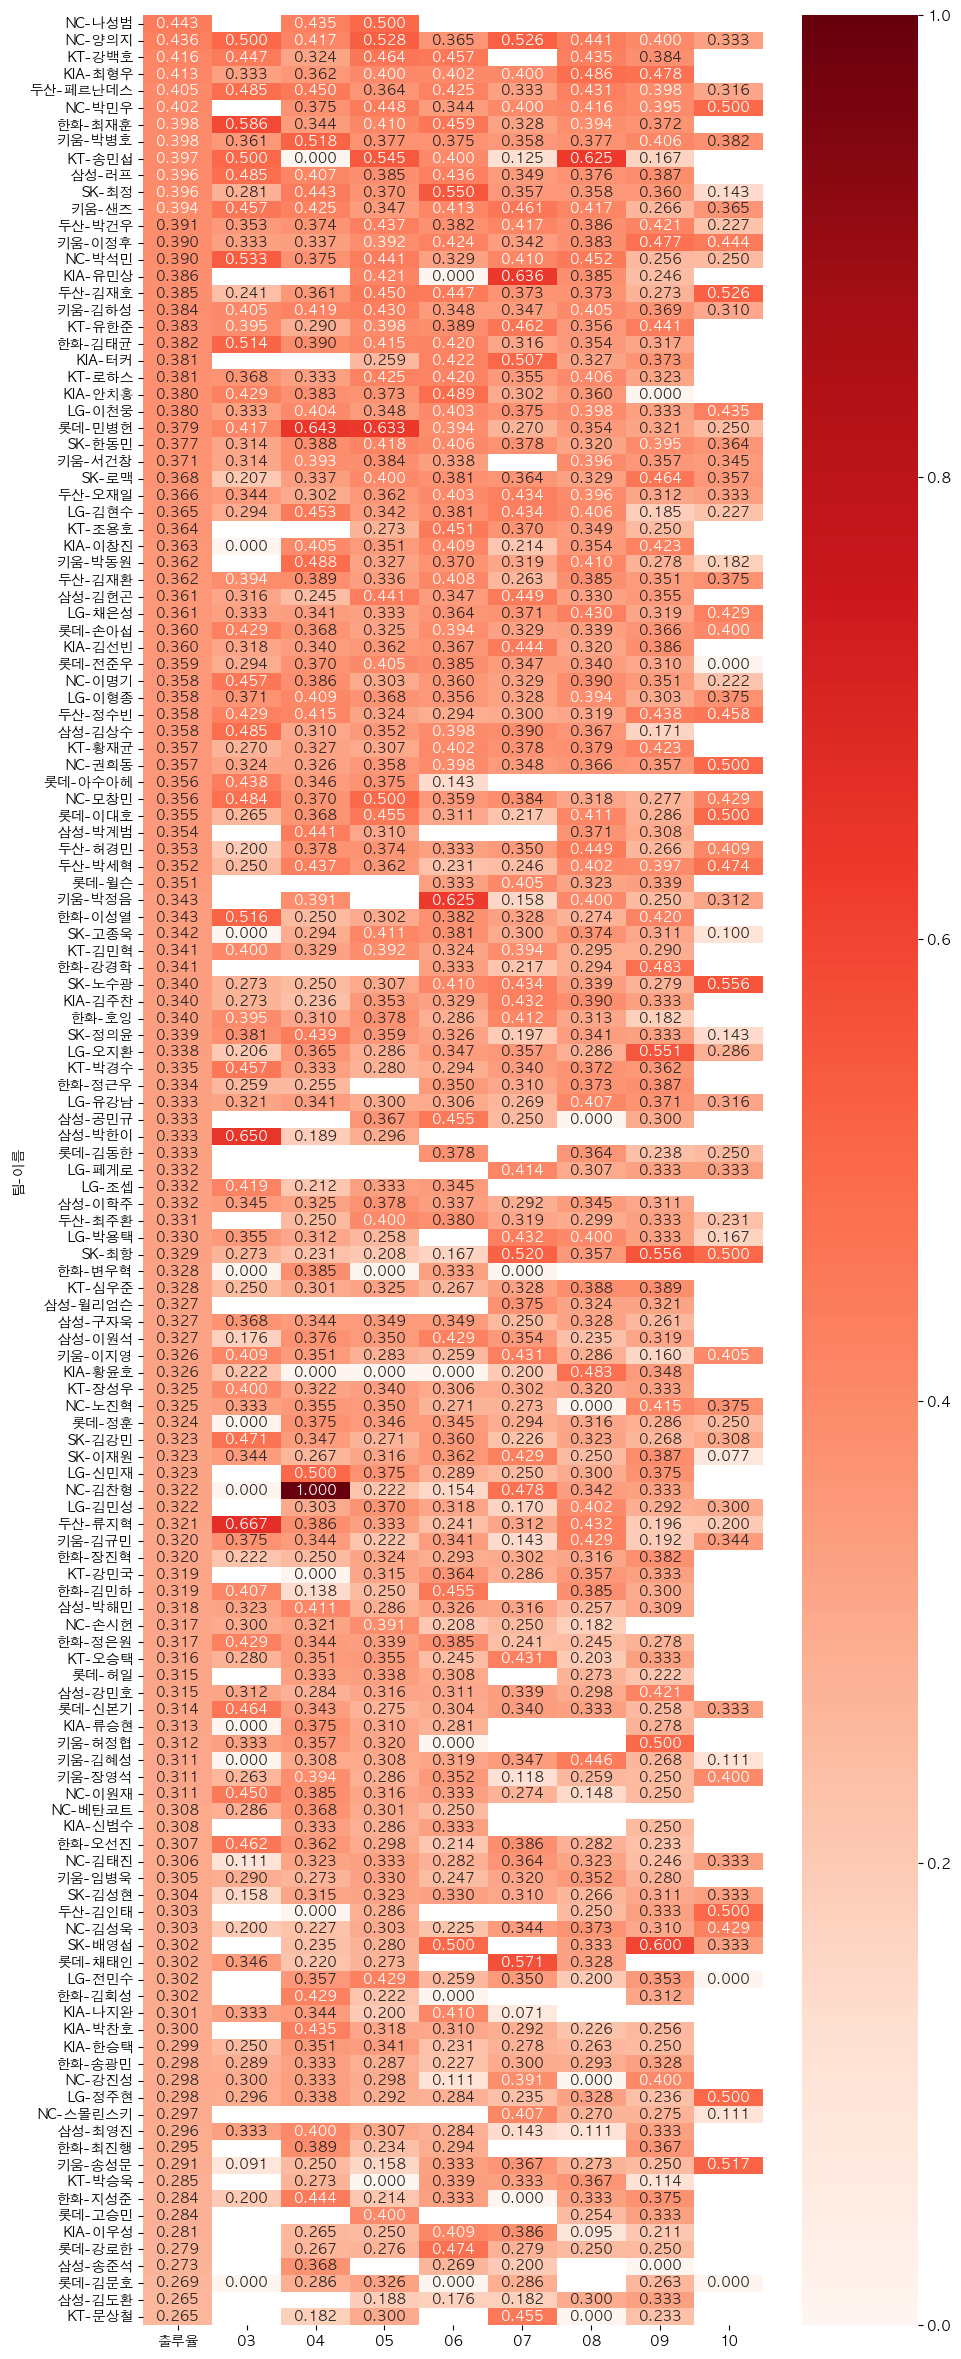

In [43]:
fig, ax = plt.subplots(figsize=(10,30)) #그래프 크기 크게 조정
sns.heatmap(df_selected,
           annot = True, fmt = '.3f',
           cmap = 'Reds')

In [44]:
for col in df_selected.columns[1:]:
    df_selected[col] = df_selected[col] - df_selected['출루율']
    
df_selected['출루율'] =0.0
df_selected.head()

출루율        03        04        05        06        07        08  \
팀   이름                                                                       
NC  나성범    0.0       NaN -0.008614  0.056604       NaN       NaN       NaN   
    양의지    0.0  0.063715 -0.019618  0.091805 -0.071702  0.090031  0.004891   
KT  강백호    0.0  0.031527 -0.092032  0.048444  0.040680       NaN  0.019453   
KIA 최형우    0.0 -0.079279 -0.050910 -0.012613 -0.010551 -0.012613  0.073102   
두산  페르난데스  0.0  0.079361  0.044053 -0.041081  0.019291 -0.072154  0.025705   

                 09        10  
팀   이름                         
NC  나성범         NaN       NaN  
    양의지   -0.036285 -0.102952  
KT  강백호   -0.032280       NaN  
KIA 최형우    0.065648       NaN  
두산  페르난데스 -0.007897 -0.089698

<AxesSubplot:ylabel='팀-이름'>

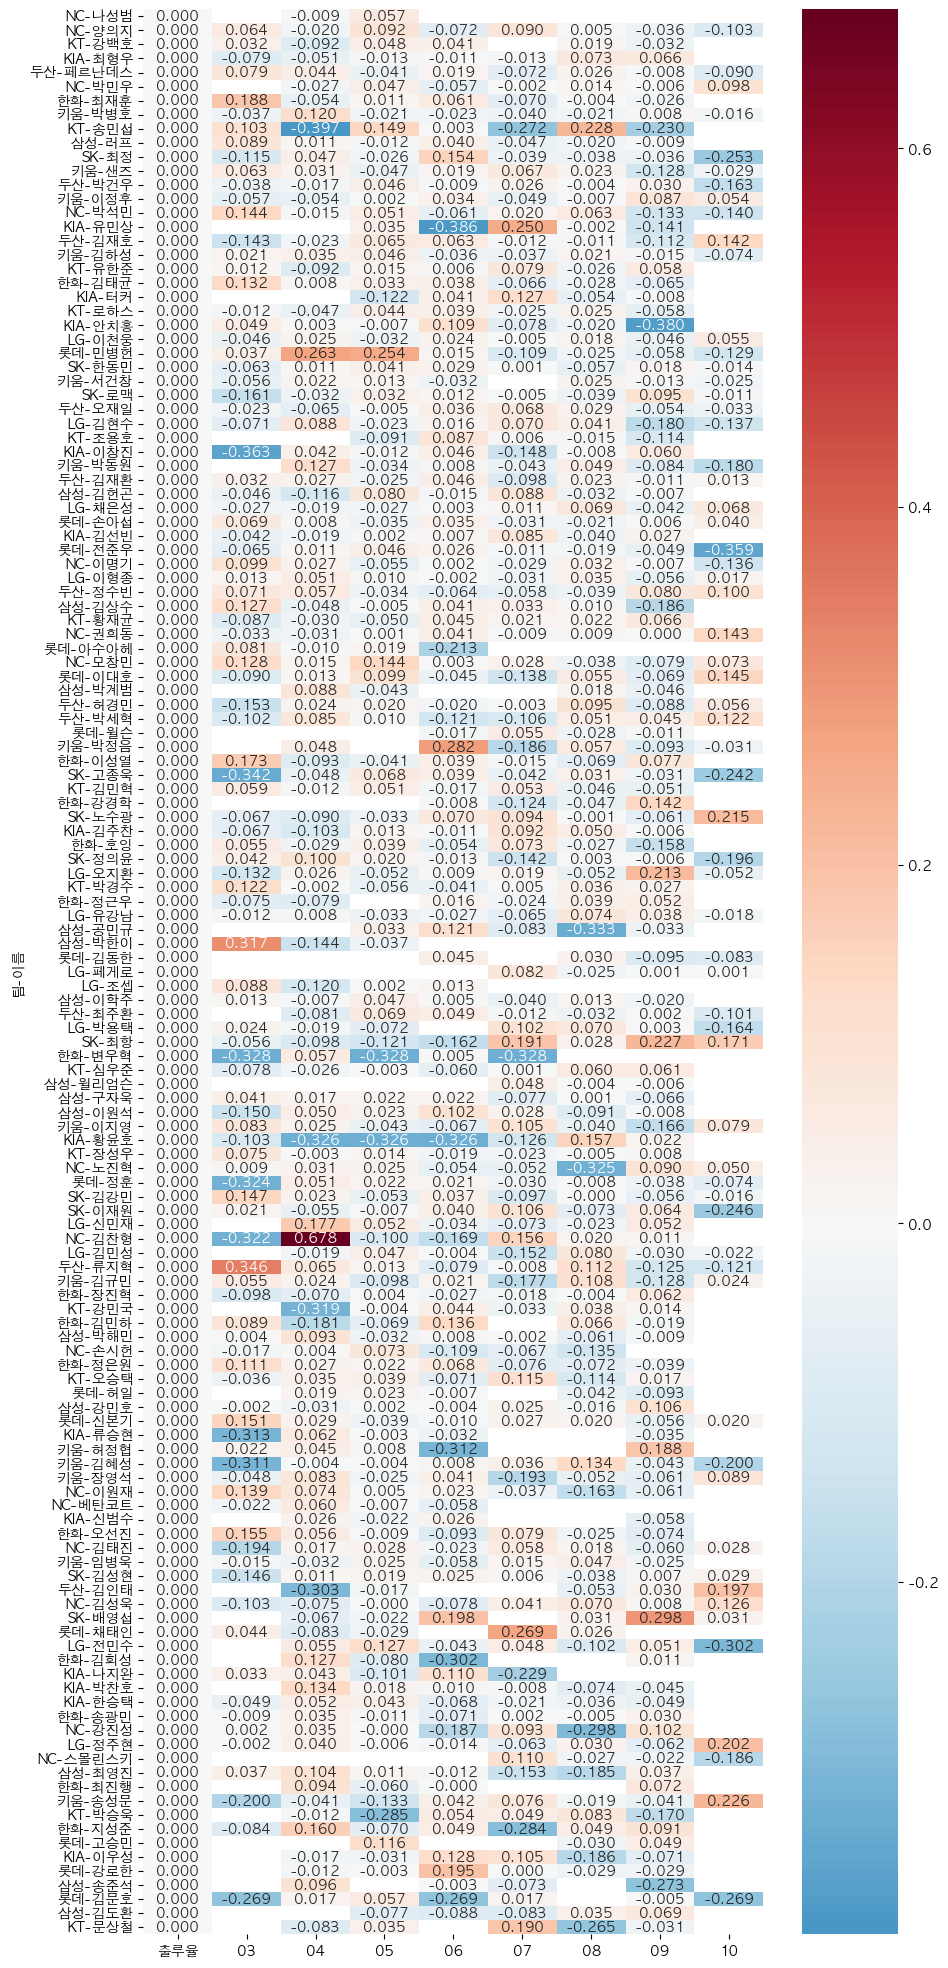

In [48]:
fig, ax = plt.subplots(figsize = (10,25))
sns.heatmap(df_selected,
           annot = True, fmt = '.3f',
           cmap = 'RdBu_r', center = 0)